# Simulación de eventos discretos del sistema de inventario en Python

Datos:

• Vender productos por r = 100 (solo se pueden vender los que están en stock)

• Período entre llegadas del cliente distribución exponencial (λ= 5)

• Cada cliente demanda productos D~uniforme(1,4)

• Política de pedidos (s,S): si el inventario es x < s , ordene y = S-x

• Costos c(y)=50y para ordenar y unidades

• Retraso de L = 2 días hasta la entrega

• Costo de mantenimiento de k = 2 por artículo por día



El código  es un ejemplo de una simulación de un sistema de inventario de almacén utilizando la biblioteca SimPy. Modela la gestión de inventario y el proceso de pedido en función de ciertos parámetros como el límite de pedido y el objetivo de pedido.
1. Importar bibliotecas necesarias: El código comienza importando las bibliotecas necesarias, a saber, SimPy y NumPy.



In [7]:
#https://pypi.org/simple
!pip install simpy
import simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import simpy

import numpy as np

2.Definir funciones:

a. warehouse_run: Esta función representa el proceso principal de la simulación del almacén. Se ejecuta indefinidamente utilizando un bucle while. Genera un tiempo entre llegadas, espera esa duración y luego simula la demanda de inventario. Si la demanda es menor que el inventario actual, se actualiza el inventario en consecuencia. De lo contrario, el inventario se agota y el sistema se queda sin stock. Si el inventario cae por debajo del nivel de corte del pedido y no se realiza ningún pedido en ese momento, se inicia el proceso handle_order para realizar un pedido.

In [14]:
def warehouse_run(env, order_cutoff, order_target):
  global inventory, balance, num_ordered

  inventory= order_target
  balance= 0.0
  num_ordered=0

  while True:
    interarrival = generate_interarrival()
    yield env.timeout(interarrival)
    balance -= inventory*2*interarrival
    demand= generate_demand()
    if demand < inventory:
      balance= 100*demand
      inventory -= demand
      print ('{:.2f} sold {}'.format(env.now, inventory))
    else:
      balance+= 100*inventory
      inventory = 0
      print ('{:.2f} sold {} (out of stock)'.format(env.now, inventory))

    if inventory < order_cutoff and  num_ordered == 0:
       env.process(handle_order(env,order_target))

b. `handle_order`: Esta función representa el proceso de manejo de un pedido. Calcula la cantidad a pedir, deduce el costo del saldo, espera 2.0 unidades de tiempo (que representa el tiempo de procesamiento del pedido) y actualiza el inventario al recibir la cantidad pedida.


In [15]:
def handle_order (env, order_target):
  global inventory, balance, num_ordered

  num_ordered = order_target - inventory
  print ('{:.2f} placed order for {}'.format(env.now, num_ordered))
  balance -= 50*num_ordered
  yield env.timeout(2.0)
  inventory += num_ordered
  num_ordered=0
  print ('{:.2f} received order, {} in inventory'.format(env.now, inventory))


c. `generate_interarrival`: Esta función genera tiempos aleatorios entre las demandas de inventario. Utiliza una distribución exponencial con una media de 1/5.

d. `generate_demand`: Esta función genera demandas aleatorias de inventario. Utiliza una distribución uniforme para generar enteros entre 1 y 4.

3. Definir variables de observación: Se definen dos listas, `obs_time` y `inventory_level`, para almacenar los puntos de tiempo observados y los niveles de inventario correspondientes.



In [16]:
def generate_interarrival():
  return np.random.exponential(1./5)

def generate_demand():
  return np.random.randint(1, 5)

obs_time = []
inventory_level = []



4. Definir el proceso de observación: La función `observe` se define para registrar periódicamente el tiempo actual y el nivel de inventario. Se ejecuta indefinidamente y espera un intervalo de tiempo fijo de 0.1 unidades entre cada observación.

5. Establecer semilla aleatoria e inicializar el entorno SimPy: La semilla aleatoria se establece en 0 para garantizar la reproducibilidad, y se crea un entorno SimPy.

6. Crear y ejecutar los procesos de simulación: Se crean dos procesos de simulación utilizando la función `env.process`. Un proceso representa la simulación principal del almacén (`warehouse_run`) y el otro proceso representa el proceso de observación (`observe`).

7. La simulación se ejecuta llamando a `env.run(until=5.0)`, especificando que la simulación debe ejecutarse hasta el tiempo 5.0. Durante la simulación, los eventos y los procesos se programan y se ejecutan según la lógica definida.


In [17]:
def observe (env):
  global inventory

  while True:
    obs_time.append(env.now)
    inventory_level.append(inventory)
    yield env.timeout(0.1)

np.random.seed(0) #Genera números aleatorios iniciando en 0
env=simpy.Environment() #crea el entorno simpy
env.process(warehouse_run (env, 10, 30)) #el inicio de pedido es en 10 y el inventario inicial de 30
env.process(observe (env))

env.run(until=5.0) #peridos en que se ejecuta

0.16 sold 28
0.53 sold 24
0.69 sold 22
0.88 sold 19
1.00 sold 16
1.01 sold 15
1.11 sold 12
1.44 sold 9
1.44 placed order for 21
1.61 sold 7
1.97 sold 6
1.99 sold 2
2.08 sold 0 (out of stock)
2.38 sold 0 (out of stock)
2.79 sold 0 (out of stock)
3.11 sold 0 (out of stock)
3.26 sold 0 (out of stock)
3.28 sold 0 (out of stock)
3.44 received order, 21 in inventory
3.46 sold 19
4.04 sold 15
4.06 sold 11
4.12 sold 7
4.12 placed order for 23
4.39 sold 6
4.56 sold 5
4.63 sold 3
4.82 sold 2
4.92 sold 1


Ahora se crea un gráfico que muestra el nivel de inventario a lo largo del tiempo durante la simulación.

1. `import matplotlib.pyplot as plt`: Importa la biblioteca Matplotlib y la renombra como `plt` para facilitar su uso.

2. `plt.figure()`: Crea una nueva figura de gráfico.

3. `plt.step(obs_time, inventory_level, where='post')`: Genera un gráfico de pasos donde los puntos (tiempo de observación) se representan por los valores de nivel de inventario. El parámetro `obs_time` se refiere a la lista de tiempos de observación y `inventory_level` es la lista de niveles de inventario registrados en cada punto de tiempo. El argumento `where='post'` indica que los pasos deben dibujarse a partir del punto dado en el eje x.

4. `plt.xlabel('Simulation time (days)')`: Etiqueta el eje x del gráfico como "Tiempo de simulación (días)".

5. `plt.ylabel('Inventory level')`: Etiqueta el eje y del gráfico como "Nivel de inventario".

Esta sección del código utiliza Matplotlib para visualizar los datos registrados durante la simulación. El gráfico resultante mostrará el nivel de inventario en función del tiempo, lo que permite analizar y comprender cómo cambia el inventario a lo largo del tiempo en el almacén simulado.
En general, el código simula la gestión de inventario de un almacén mediante la generación de demandas y tiempos de llegada aleatorios. Realiza un seguimiento del nivel de inventario, el saldo y los eventos de pedido/envío. El proceso de observación registra el nivel de inventario a lo largo del tiempo con fines de análisis o visualización.

Text(0, 0.5, 'Inventory level')

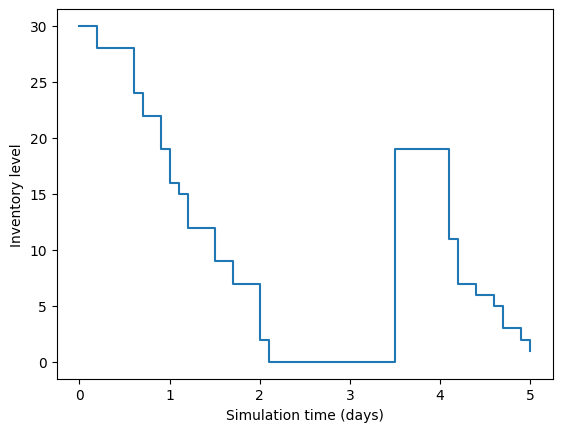

In [18]:
import matplotlib.pyplot as plt

plt.figure()
plt.step(obs_time, inventory_level, where='post')
plt.xlabel('Simulation time (days)')
plt.ylabel('Inventory level')